In [21]:
import numpy as np 
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle

In [12]:
data = pd.read_csv("data\student-mat.csv", sep=";")
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [13]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head(5))

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


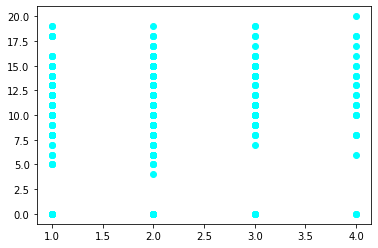

In [19]:
plt.scatter(data.studytime, data.G3, color='aqua')

In [14]:
predict = "G3"

X = np.array(data.drop([predict], 1)) #this array contains features
y = np.array(data[predict]) # this array contains labels

C:\Users\pjjon\AppData\Local\Temp\ipykernel_20484\2960945942.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop([predict], 1))


In [15]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [16]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
accuracy = linear.score(x_test, y_test)
print(accuracy)

0.8290809261995917


In [17]:
print("Coefficient / Slope: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)

Coefficient / Slope: 
 [ 0.18020843  0.95713806 -0.17290983 -0.30804316  0.0408971 ]
Intercept: 
 -1.6127936524296924


In [20]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
  print(predictions[x], x_test[x], y_test[x])

9.29981730647145 [ 8 10  2  0  6] 10
7.313068436520409 [8 8 1 0 0] 11
19.360020471874442 [18 18  1  1 24] 18
8.95303219795756 [10 10  3  2  8] 10
8.260885052838482 [8 9 2 0 4] 10
8.621301908632649 [10  9  2  0  4] 9
13.471807956963913 [12 14  3  0  1] 15
3.891707521715542 [5 5 2 0 4] 6
14.91205416227857 [14 15  3  0  4] 16
4.910540721410902 [7 6 1 1 0] 0
6.183020545572544 [8 7 2 0 0] 8
8.111893866902669 [10  9  4  0  0] 0
9.350151035800929 [ 9  9  1  0 22] 9
9.42980719294116 [ 9 10  3  0  9] 9
14.63545434499216 [11 15  1  0  2] 15
9.578439970490571 [10 10  2  0  4] 10
15.003169799593467 [14 15  2  0  2] 15
12.826891056205495 [13 13  2  0  0] 13
12.661279825922692 [14 13  4  0  0] 14
11.184672930709837 [10 12  2  1  4] 12
6.355930374662488 [8 7 1 0 0] 6
11.559669867882882 [12 11  1  0 16] 11
6.941307288453684 [7 8 4 0 8] 8
13.519038201324573 [15 14  3  2  4] 15
18.06209101187146 [16 18  3  0  2] 18
10.191781220901316 [ 9 11  2  0  0] 12
10.725107905785427 [11 11  1  0  0] 10
3.386835885

In [22]:
with open("studentgrades.pickle", "wb") as f:
  pickle.dump(linear,f)

In [23]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

In [25]:
best = 0
for _ in range(20):
  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

  linear = linear_model.LinearRegression()

  linear.fit(x_train, y_train)
  accuracy = linear.score(x_test, y_test)
  print("Accuracy: " + str(accuracy))

  if accuracy > best:
    best = accuracy
    with open("studentgrades.pickle", "wb") as f:
      pickle.dump(linear, f)


Accuracy: 0.8672267631795947
Accuracy: 0.8181975024045481
Accuracy: 0.8357046648833173
Accuracy: 0.7731219007785289
Accuracy: 0.7643924113361534
Accuracy: 0.8463074482223465
Accuracy: 0.7746023086265792
Accuracy: 0.848151574140652
Accuracy: 0.8304503141701693
Accuracy: 0.8054931114091675
Accuracy: 0.7985165122727272
Accuracy: 0.7433405196426062
Accuracy: 0.8551589722288617
Accuracy: 0.8508736391978835
Accuracy: 0.7851420506361577
Accuracy: 0.9294857162521343
Accuracy: 0.7878965986367948
Accuracy: 0.8234853475866843
Accuracy: 0.8988998436608125
Accuracy: 0.866301657435961


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


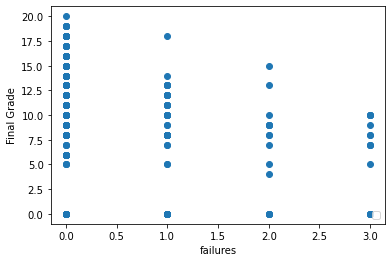

In [26]:
plot = "failures" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()